# Importing Needed Libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

# Reading The Data

In [14]:
data_dir=r"C:\Users\hp\OneDrive\Desktop\Forecast Gold Price\Gold_data.csv"
df = pd.read_csv(data_dir)

# Data Exploration

In [15]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [17]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


# Set Date column as an index

In [18]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace= True)

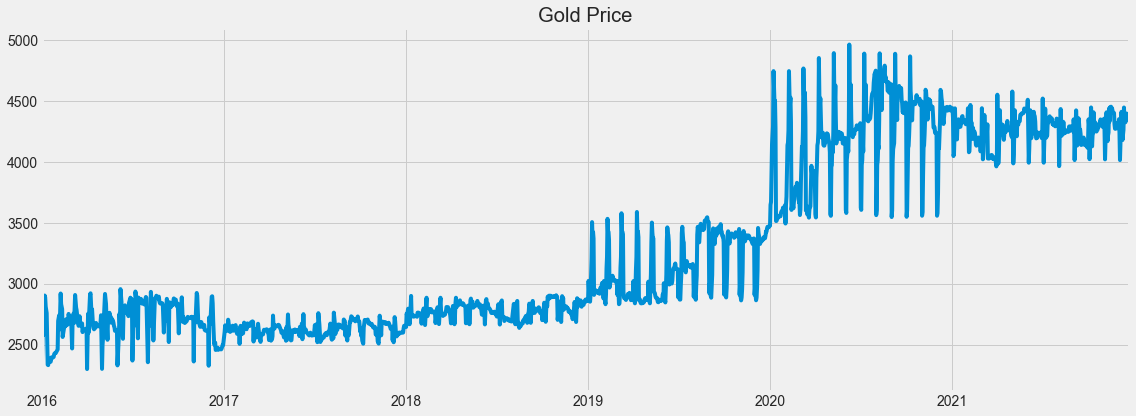

In [7]:
plt.figure(figsize=(16, 6))
df['price'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Gold Price")
plt.tight_layout()
plt.show()

# Data Preprocessing

# Choosing Prediction Column

In [19]:
n_cols = 1
dataset = df["price"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(2182, 1)

# Normalizing Data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

# Splitting the Data

In [21]:
# 90% to Train , 10% to Test
train_size = int(len(df) * 0.90)
test_size = len(df) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1963 Test Size : 219


In [22]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1963, 1)

# Creating training set

In [23]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 100
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.        ],
       [0.07440027],
       [0.16785201],
       [0.11983639],
       [0.12718797],
       [0.13453956],
       [0.23996757],
       [0.23407156],
       [0.20680252],
       [0.19685301],
       [0.18690349],
       [0.10922357],
       [0.03058555],
       [0.02925895],
       [0.04171426],
       [0.04218103],
       [0.0426478 ],
       [0.04311457],
       [0.03935586],
       [0.05214283],
       [0.05269558],
       [0.05074253],
       [0.05186031],
       [0.0529781 ],
       [0.05409588],
       [0.06201865],
       [0.0649298 ],
       [0.0658142 ],
       [0.0654457 ],
       [0.06826473],
       [0.07108376],
       [0.07390279],
       [0.07672182],
       [0.16309835],
       [0.17159229],
       [0.18008623],
       [0.13734016],
       [0.19173085],
       [0.24612153],
       [0.21376718],
       [0.20632347],
       [0.19887976],
       [0.11452998],
       [0.12417241],
       [0.13381484],
       [0.14345727],
       [0.14493127],
  

In [24]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [26]:
x_train.shape , y_train.shape

((1863, 100, 1), (1863, 1))

# LSTM Model

# Model Dtructure

In [27]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [29]:
# Fitting the LSTM to the Training set
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
59/59 [==============================] - 6s 50ms/step - loss: 0.0200 - mean_absolute_error: 0.0897
Epoch 2/100
59/59 [==============================] - 3s 48ms/step - loss: 0.0047 - mean_absolute_error: 0.0415
Epoch 3/100
59/59 [==============================] - 3s 47ms/step - loss: 0.0047 - mean_absolute_error: 0.0417
Epoch 4/100
59/59 [==============================] - 3s 48ms/step - loss: 0.0048 - mean_absolute_error: 0.0429
Epoch 5/100
59/59 [==============================] - 3s 44ms/step - loss: 0.0043 - mean_absolute_error: 0.0396
Epoch 6/100
59/59 [==============================] - 3s 51ms/step - loss: 0.0043 - mean_absolute_error: 0.0401
Epoch 7/100
59/59 [==============================] - 3s 53ms/step - loss: 0.0038 - mean_absolute_error: 0.0374
Epoch 8/100
59/59 [==============================] - 3s 46ms/step - loss: 0.0034 - mean_absolute_error: 0.0356
Epoch 9/100
59/59 [==============================] - 2s 42ms/step - loss: 0.0031 - mean_absolute_error: 0.0345
E

In [43]:
# Model Evaluation

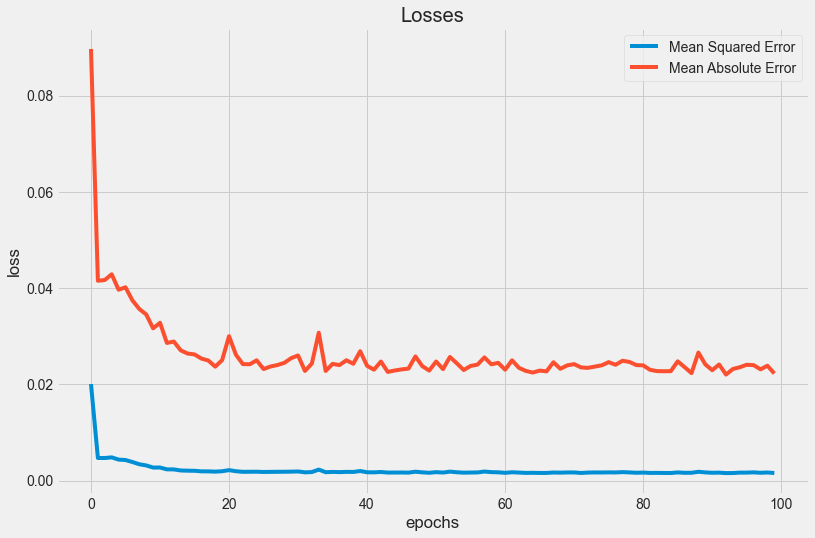

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Prediction

# Creating testing set

In [37]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [38]:
x_test.shape , y_test.shape

((219, 1, 1), (219, 1))

In [39]:
# Get Prediction
predictions = model.predict(x_test)

7/7 [==============================] - 1s 3ms/step


In [40]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(219, 1)

# Root mean square error

In [41]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

304.94

In [42]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,4061.942627,4387.9
1,4060.541260,4386.1
2,4069.726074,4397.9
3,4071.825928,4400.6
4,4070.892822,4399.4
...,...,...
214,4067.002930,4394.4
215,4063.188477,4389.5
216,4063.188477,4389.5
217,4035.576172,4354.1


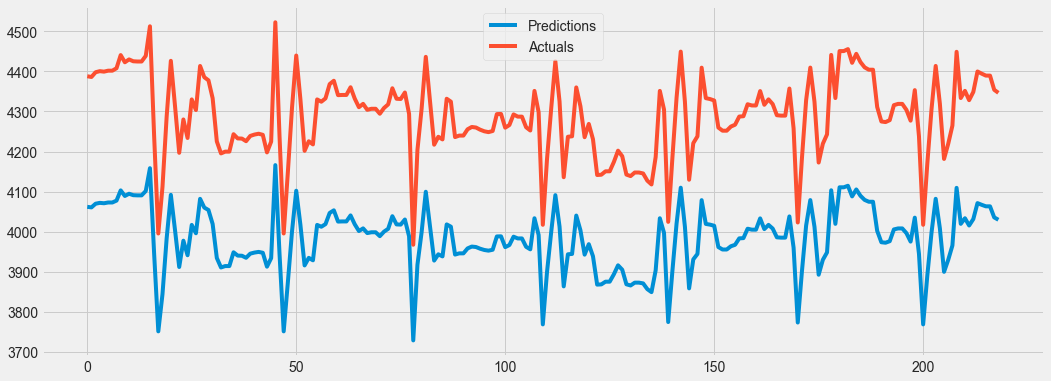

In [43]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# Visualize Predictions with The Data
## for one feature

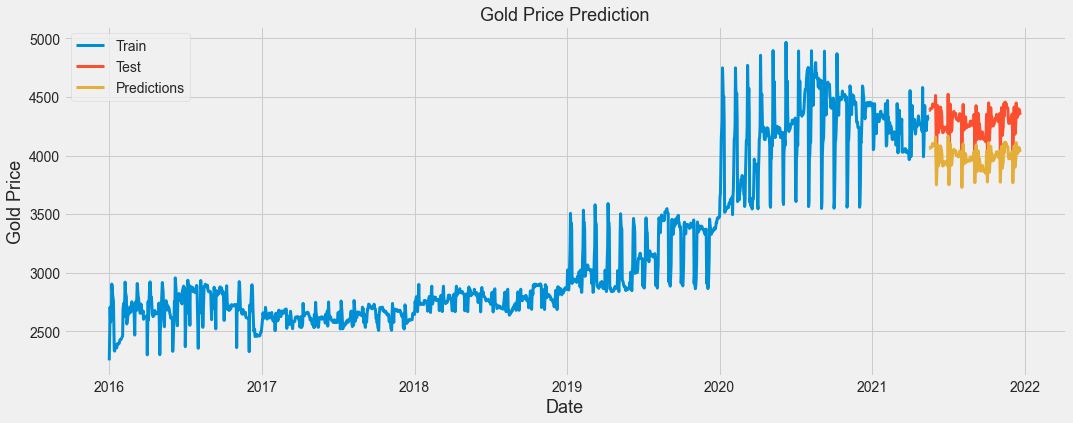

In [44]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Gold Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Gold Price', fontsize= 18)
plt.plot(train['price'], linewidth= 3)
plt.plot(test['price'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])